In [16]:
import pandas as pd
import numpy as np
import matplotlib as plt
from functools import reduce
from pandas.tseries.offsets import MonthEnd
%matplotlib inline 

# Index
df_Index = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                          sheet_name = 'Index', 
                          na_values = "-"))
df_Index.columns = pd.to_datetime(df_Index.columns, format = '%Y/%m').strftime('%b-%Y')
df_Index = df_Index.melt(var_name='Date',value_name='ISIN')
df_Index['Date_ISIN'] = df_Index['Date'].map(str)+"_"+ df_Index['ISIN']
cols = list(df_Index)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_Index = df_Index.loc[:, cols]
df_Index.tail(3)

,Date_ISIN,Date,ISIN
13847,Feb-2026_aap,Feb-2026,aap
13848,Feb-2026_aaaj,Feb-2026,aaaj
13849,Feb-2026_x,Feb-2026,x


In [46]:
# Price
df_Price = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                       sheet_name = 'Px', 
                       na_values = "-"))
ISIN = df_Price.pop('ISIN')
df_Price.columns = pd.to_datetime(df_Price.columns, format = '%Y/%m').strftime('%b-%Y')
df_Price.insert(loc = 0, column = 'ISIN', value = ISIN)
df_Price = df_Price.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'Price')
df_Price['Date_ISIN'] = df_Price['Date'].map(str)+"_"+ df_Price['ISIN']
cols = list(df_Price)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_Price = df_Price.loc[:, cols]
df_Price = df_Price[['Date_ISIN', 'Price']]
df_Price.tail(3)


,Date_ISIN,Price
55397,Feb-2026_aaaw,3.837776e+13
55398,Feb-2026_aaax,3.028519e+13
55399,Feb-2026_aaay,2.235554e+13


In [3]:
# Monthly RI
df_RI = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                       sheet_name = 'RI', 
                       na_values = "-"))
ISIN = df_RI.pop('ISIN')
df_RI.columns = pd.to_datetime(df_RI.columns, format = '%Y/%m').strftime('%b-%Y')
df_RI.insert(loc = 0, column = 'ISIN', value = ISIN)
df_RI = df_RI.set_index('ISIN')
df_RI = df_RI.T
df_RI.tail(3)

ISIN,a,b,c,d,e,f,g,h,i,j,...,aaap,aaaq,aaar,aaas,aaat,aaau,aaav,aaaw,aaax,aaay
Dec-2025,1.122392e+14,3.380763e+13,6.569656e+13,3.996267e+13,6.530192e+13,1.282750e+13,2.287960e+13,2.022180e+13,8.045476e+13,3.582728e+13,...,4.960254e+13,4.435567e+13,4.601091e+13,4.686748e+13,2.290468e+13,8.059653e+12,2.197377e+13,3.630771e+13,2.771627e+13,1.871784e+13
Jan-2026,1.176461e+14,3.704928e+13,7.034080e+13,4.095049e+13,7.012293e+13,1.328378e+13,2.422953e+13,2.086000e+13,8.463152e+13,3.693103e+13,...,5.261479e+13,4.845966e+13,4.889348e+13,4.729670e+13,2.419414e+13,8.856206e+12,2.226559e+13,3.791829e+13,2.868700e+13,2.044444e+13
Feb-2026,1.234312e+14,4.068074e+13,7.562455e+13,4.444248e+13,7.595698e+13,1.408668e+13,2.448765e+13,2.219910e+13,8.766282e+13,4.021520e+13,...,5.553891e+13,5.130280e+13,4.932020e+13,4.957754e+13,2.537652e+13,9.602832e+12,2.411099e+13,3.837776e+13,3.028519e+13,2.235554e+13


In [4]:
# 1m TR chg
df_TR_1m = df_RI / df_RI.shift(1)-1
df_TR_1m = df_TR_1m.T.reset_index()
df_TR_1m = df_TR_1m.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'TR_1m')
df_TR_1m['Date_ISIN'] = df_TR_1m['Date'].map(str)+"_"+ df_TR_1m['ISIN']
cols = list(df_TR_1m)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_TR_1m = df_TR_1m.loc[:, cols]
df_TR_1m = df_TR_1m[['Date_ISIN', 'TR_1m']]
df_TR_1m['TR_1m_Ann'] = (1 + df_TR_1m['TR_1m'])**(12/1)-1
df_TR_1m.tail(3)

,Date_ISIN,TR_1m,TR_1m_Ann
55397,Feb-2026_aaaw,0.012118,0.155504
55398,Feb-2026_aaax,0.055711,0.916648
55399,Feb-2026_aaay,0.093478,1.922264


In [5]:
# 3m TR chg
df_TR_3m = df_RI / df_RI.shift(3)-1
df_TR_3m = df_TR_3m.T.reset_index()
df_TR_3m = df_TR_3m.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'TR_3m')
df_TR_3m['Date_ISIN'] = df_TR_3m['Date'].map(str)+"_"+ df_TR_3m['ISIN']
cols = list(df_TR_3m)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_TR_3m = df_TR_3m.loc[:, cols]
df_TR_3m = df_TR_3m[['Date_ISIN', 'TR_3m']]
df_TR_3m['TR_3m_Ann'] = (1 + df_TR_3m['TR_3m'])**(12/3)-1
df_TR_3m.tail(3)

,Date_ISIN,TR_3m,TR_3m_Ann
55397,Feb-2026_aaaw,0.150164,0.750002
55398,Feb-2026_aaax,0.093249,0.428489
55399,Feb-2026_aaay,0.210227,1.145197


In [6]:
# 6m TR chg
df_TR_6m = df_RI / df_RI.shift(6)-1
df_TR_6m = df_TR_6m.T.reset_index()
df_TR_6m = df_TR_6m.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'TR_6m')
df_TR_6m['Date_ISIN'] = df_TR_6m['Date'].map(str)+"_"+ df_TR_6m['ISIN']
cols = list(df_TR_6m)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_TR_6m = df_TR_6m.loc[:, cols]
df_TR_6m = df_TR_6m[['Date_ISIN', 'TR_6m']]
df_TR_6m['TR_6m_Ann'] = (1 + df_TR_6m['TR_6m'])**(12/6)-1
df_TR_6m.tail(3)

,Date_ISIN,TR_6m,TR_6m_Ann
55397,Feb-2026_aaaw,0.452052,1.108455
55398,Feb-2026_aaax,0.307892,0.710582
55399,Feb-2026_aaay,0.434106,1.056660


In [7]:
# 6m lag for 6m TR chg
df_TR_6m_6mlag = df_RI.shift(6) / df_RI.shift(12)-1
df_TR_6m_6mlag = df_TR_6m_6mlag.T.reset_index()
df_TR_6m_6mlag = df_TR_6m_6mlag.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'TR_6m_6mlag')
df_TR_6m_6mlag['Date_ISIN'] = df_TR_6m_6mlag['Date'].map(str)+"_"+ df_TR_6m_6mlag['ISIN']
cols = list(df_TR_6m_6mlag)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_TR_6m_6mlag = df_TR_6m_6mlag.loc[:, cols]
df_TR_6m_6mlag = df_TR_6m_6mlag[['Date_ISIN', 'TR_6m_6mlag']]
df_TR_6m_6mlag.tail(3)

,Date_ISIN,TR_6m_6mlag
55397,Feb-2026_aaaw,0.356370
55398,Feb-2026_aaax,0.473455
55399,Feb-2026_aaay,0.397659


In [8]:
# 12m TR chg
df_TR_12m = df_RI / df_RI.shift(12)-1
df_TR_12m = df_TR_12m.T.reset_index()
df_TR_12m = df_TR_12m.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'TR_12m')
df_TR_12m['Date_ISIN'] = df_TR_12m['Date'].map(str)+"_"+ df_TR_12m['ISIN']
cols = list(df_TR_12m)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_TR_12m = df_TR_12m.loc[:, cols]
df_TR_12m = df_TR_12m[['Date_ISIN', 'TR_12m']]
df_TR_12m['TR_12m_Ann'] = (1 + df_TR_12m['TR_12m'])**(12/12)-1
df_TR_12m.tail(3)

,Date_ISIN,TR_12m,TR_12m_Ann
55397,Feb-2026_aaaw,0.969519,0.969519
55398,Feb-2026_aaax,0.927120,0.927120
55399,Feb-2026_aaay,1.004391,1.004391


In [9]:
# 12m Volatility from 1m returns
df_12mVol = (1 + df_RI / df_RI.shift(1)-1)**(12/1)-1
df_12mVol = df_12mVol.rolling(window = 12, axis = 0).std()
df_12mVol = df_12mVol.T.reset_index()
df_12mVol = df_12mVol.melt(id_vars = 'ISIN', var_name = 'Date', value_name = '12mVol')
df_12mVol['Date_ISIN'] = df_12mVol['Date'].map(str)+"_"+ df_12mVol['ISIN']
cols = list(df_12mVol)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_12mVol = df_12mVol.loc[:, cols]
df_12mVol = df_12mVol[['Date_ISIN', '12mVol']]
df_12mVol.tail(3)

,Date_ISIN,12mVol
55397,Feb-2026_aaaw,0.699871
55398,Feb-2026_aaax,0.472306
55399,Feb-2026_aaay,0.664540


In [10]:
# 3y Volatility from 1m returns
df_3yVol = (1 + df_RI / df_RI.shift(1)-1)**(12/1)-1
df_3yVol = df_3yVol.rolling(window = 36, axis = 0).std()
df_3yVol = df_3yVol.T.reset_index()
df_3yVol = df_3yVol.melt(id_vars = 'ISIN', var_name = 'Date', value_name = '3yVol')
df_3yVol['Date_ISIN'] = df_3yVol['Date'].map(str)+"_"+ df_3yVol['ISIN']
cols = list(df_3yVol)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_3yVol = df_3yVol.loc[:, cols]
df_3yVol = df_3yVol[['Date_ISIN', '3yVol']]
df_3yVol.tail(3)

,Date_ISIN,3yVol
55397,Feb-2026_aaaw,0.612330
55398,Feb-2026_aaax,0.595441
55399,Feb-2026_aaay,0.636782


In [11]:
# Create master technicals index
dfs_technicals = [df_TR_1m, df_TR_3m, df_TR_6m, df_TR_6m_6mlag, df_TR_12m, df_12mVol, df_3yVol]
df_technicals = reduce(lambda left, right: pd.merge(left, right, on = 'Date_ISIN'), dfs_technicals)
df_technicals['AvgMom_1_3_6_12'] = df_technicals[['TR_1m_Ann','TR_3m_Ann','TR_6m_Ann','TR_12m_Ann']].mean(axis = 1)
df_technicals = df_technicals[['Date_ISIN','TR_1m','TR_3m','TR_6m','TR_6m_6mlag','TR_12m','AvgMom_1_3_6_12','12mVol','3yVol']]
df_technicals.tail(3)

,Date_ISIN,TR_1m,TR_3m,TR_6m,TR_6m_6mlag,TR_12m,AvgMom_1_3_6_12,12mVol,3yVol
55397,Feb-2026_aaaw,0.012118,0.150164,0.452052,0.356370,0.969519,0.745870,0.699871,0.612330
55398,Feb-2026_aaax,0.055711,0.093249,0.307892,0.473455,0.927120,0.745710,0.472306,0.595441
55399,Feb-2026_aaay,0.093478,0.210227,0.434106,0.397659,1.004391,1.282128,0.664540,0.636782


In [28]:
# proportions of FY1-4 to take for 1y and 2y fwd per share

df_FY1 = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                       sheet_name = 'FY1', 
                       na_values = "-"))
ISIN = df_FY1.pop('ISIN')
df_FY1.columns = pd.to_datetime(df_FY1.columns, format = '%Y/%m').strftime('%b-%Y')
df_FY1.insert(loc = 0, column = 'ISIN', value = ISIN)
df_FY1 = df_FY1.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'FY1')
df_FY1['Date_ISIN'] = df_FY1['Date'].map(str)+"_"+ df_FY1['ISIN']
cols = list(df_FY1)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_FY1 = df_FY1.loc[:, cols]
df_FY1 = df_FY1[['Date_ISIN', 'Date', 'FY1']]

df_FY2 = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                       sheet_name = 'FY2', 
                       na_values = "-"))
ISIN = df_FY2.pop('ISIN')
df_FY2.columns = pd.to_datetime(df_FY2.columns, format = '%Y/%m').strftime('%b-%Y')
df_FY2.insert(loc = 0, column = 'ISIN', value = ISIN)
df_FY2 = df_FY2.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'FY2')
df_FY2['Date_ISIN'] = df_FY2['Date'].map(str)+"_"+ df_FY2['ISIN']
cols = list(df_FY2)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_FY2 = df_FY2.loc[:, cols]
df_FY2 = df_FY2[['Date_ISIN', 'FY2']]

df_FY3 = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                       sheet_name = 'FY3', 
                       na_values = "-"))
ISIN = df_FY3.pop('ISIN')
df_FY3.columns = pd.to_datetime(df_FY3.columns, format = '%Y/%m').strftime('%b-%Y') 
# note that strftime converts datetime object to string
df_FY3.insert(loc = 0, column = 'ISIN', value = ISIN)
df_FY3 = df_FY3.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'FY3')
df_FY3['Date_ISIN'] = df_FY3['Date'].map(str)+"_"+ df_FY3['ISIN']
cols = list(df_FY3)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_FY3 = df_FY3.loc[:, cols]
df_FY3 = df_FY3[['Date_ISIN', 'FY3']]
#df_FY3.tail(3)

df_FY4 = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                       sheet_name = 'FY4', 
                       na_values = "-"))
ISIN = df_FY4.pop('ISIN')
df_FY4.columns = pd.to_datetime(df_FY4.columns, format = '%Y/%m').strftime('%b-%Y') 
# note that strftime converts datetime object to string
df_FY4.insert(loc = 0, column = 'ISIN', value = ISIN)
df_FY4 = df_FY4.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'FY4')
df_FY4['Date_ISIN'] = df_FY4['Date'].map(str)+"_"+ df_FY4['ISIN']
cols = list(df_FY4)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_FY4 = df_FY4.loc[:, cols]
df_FY4 = df_FY4[['Date_ISIN', 'FY4']]
#df_FY4.tail(3)

# Combine DFs
dfs_YrProportions = [df_FY1, df_FY2, df_FY3, df_FY4]
df_YrProportions = reduce(lambda left, right: pd.merge(left, right, on = 'Date_ISIN'), dfs_YrProportions)

# re-formatting date column so we can work with it
df_YrProportions['Date'] = pd.to_datetime(df_YrProportions['Date'], format='%b-%Y') + MonthEnd(0) 
df_YrProportions['FY1vsSpot'] = (pd.to_timedelta(df_YrProportions['FY1'] - df_YrProportions['Date'])).astype('timedelta64[D]') 
df_YrProportions['FY2vsSpot'] = (pd.to_timedelta(df_YrProportions['FY2'] - df_YrProportions['Date'])).astype('timedelta64[D]')
df_YrProportions['FY3vsSpot'] = (pd.to_timedelta(df_YrProportions['FY3'] - df_YrProportions['Date'])).astype('timedelta64[D]') 
df_YrProportions['FY4vsSpot'] = (pd.to_timedelta(df_YrProportions['FY4'] - df_YrProportions['Date'])).astype('timedelta64[D]') 

UseFY1_in1y = (df_YrProportions['FY1vsSpot'] > 0) & (df_YrProportions['FY1vsSpot'] <= 365)
UseFY2_in1y = (df_YrProportions['FY2vsSpot'] > 0) & (df_YrProportions['FY2vsSpot'] <= 365)
UseFY3_in1y = (df_YrProportions['FY3vsSpot'] > 0) & (df_YrProportions['FY3vsSpot'] <= 365)
UseFY4_in1y = (df_YrProportions['FY4vsSpot'] > 0) & (df_YrProportions['FY4vsSpot'] <= 365)

UseFY1_in2y = (df_YrProportions['FY1vsSpot'] > 365) & (df_YrProportions['FY1vsSpot'] <= 365*2)
UseFY2_in2y = (df_YrProportions['FY2vsSpot'] > 365) & (df_YrProportions['FY2vsSpot'] <= 365*2)
UseFY3_in2y = (df_YrProportions['FY3vsSpot'] > 365) & (df_YrProportions['FY3vsSpot'] <= 365*2)
UseFY4_in2y = (df_YrProportions['FY4vsSpot'] > 365) & (df_YrProportions['FY4vsSpot'] <= 365*2)


df_YrProportions['%_FY1_1yFwd'] = np.where(UseFY1_in1y, df_YrProportions['FY1vsSpot'] / 365, 0)
df_YrProportions['%_FY2_1yFwd'] = (np.where(UseFY1_in1y, 1 - df_YrProportions['%_FY1_1yFwd'], 
                                            np.where(UseFY2_in1y, df_YrProportions['FY2vsSpot'] / 365,0)))
df_YrProportions['%_FY3_1yFwd'] = (np.where(UseFY2_in1y, 1 - df_YrProportions['%_FY2_1yFwd'], 
                                            np.where(UseFY3_in1y, df_YrProportions['FY3vsSpot'] / 365,0)))
df_YrProportions['%_FY4_1yFwd'] = (np.where(UseFY3_in1y, 1 - df_YrProportions['%_FY3_1yFwd'], 
                                            np.where(UseFY4_in1y, df_YrProportions['FY4vsSpot'] / 365,0)))

df_YrProportions['%_FY1_2yFwd'] = np.where(UseFY1_in2y, (df_YrProportions['FY1vsSpot'] - 365) / 365, 0)
df_YrProportions['%_FY2_2yFwd'] = (np.where(UseFY1_in2y, 1 - df_YrProportions['%_FY1_2yFwd'], 
                                            np.where(UseFY2_in2y, (df_YrProportions['FY2vsSpot'] - 365) / 365,0)))
df_YrProportions['%_FY3_2yFwd'] = (np.where(UseFY2_in2y, 1 - df_YrProportions['%_FY2_2yFwd'], 
                                            np.where(UseFY3_in2y, (df_YrProportions['FY3vsSpot'] - 365) / 365,0)))
df_YrProportions['%_FY4_2yFwd'] = (np.where(UseFY3_in2y, 1 - df_YrProportions['%_FY3_2yFwd'], 
                                            np.where(UseFY4_in2y, (df_YrProportions['FY4vsSpot'] - 365) / 365,0)))
df_YrProportions = df_YrProportions[['Date_ISIN', '%_FY1_1yFwd', '%_FY2_1yFwd','%_FY3_1yFwd','%_FY4_1yFwd','%_FY1_2yFwd', '%_FY2_2yFwd','%_FY3_2yFwd','%_FY4_2yFwd']]
df_YrProportions.tail(3)


,Date_ISIN,%_FY1_1yFwd,%_FY2_1yFwd,%_FY3_1yFwd,%_FY4_1yFwd,%_FY1_2yFwd,%_FY2_2yFwd,%_FY3_2yFwd,%_FY4_2yFwd
55397,Feb-2026_aaaw,0.838356,0.161644,0.0,0.0,0.0,0.838356,0.161644,0.0
55398,Feb-2026_aaax,0.838356,0.161644,0.0,0.0,0.0,0.838356,0.161644,0.0
55399,Feb-2026_aaay,0.838356,0.161644,0.0,0.0,0.0,0.838356,0.161644,0.0


In [30]:
# EPS calculation (repeat for DPS, BPS etc)

df_EPS1 = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                       sheet_name = 'EPS1', 
                       na_values = "-"))
ISIN = df_EPS1.pop('ISIN')
df_EPS1.columns = pd.to_datetime(df_EPS1.columns, format = '%Y/%m').strftime('%b-%Y')
df_EPS1.insert(loc = 0, column = 'ISIN', value = ISIN)
df_EPS1 = df_EPS1.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'EPS1')
df_EPS1['Date_ISIN'] = df_EPS1['Date'].map(str)+"_"+ df_EPS1['ISIN']
cols = list(df_EPS1)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_EPS1 = df_EPS1.loc[:, cols]
df_EPS1 = df_EPS1[['Date', 'Date_ISIN', 'EPS1']]

df_EPS2 = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                       sheet_name = 'EPS2', 
                       na_values = "-"))
ISIN = df_EPS2.pop('ISIN')
df_EPS2.columns = pd.to_datetime(df_EPS2.columns, format = '%Y/%m').strftime('%b-%Y')
df_EPS2.insert(loc = 0, column = 'ISIN', value = ISIN)
df_EPS2 = df_EPS2.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'EPS2')
df_EPS2['Date_ISIN'] = df_EPS2['Date'].map(str)+"_"+ df_EPS2['ISIN']
cols = list(df_EPS2)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_EPS2 = df_EPS2.loc[:, cols]
df_EPS2 = df_EPS2[['Date_ISIN', 'EPS2']]

df_EPS3 = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                       sheet_name = 'EPS3', 
                       na_values = "-"))
ISIN = df_EPS3.pop('ISIN')
df_EPS3.columns = pd.to_datetime(df_EPS3.columns, format = '%Y/%m').strftime('%b-%Y')
df_EPS3.insert(loc = 0, column = 'ISIN', value = ISIN)
df_EPS3 = df_EPS3.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'EPS3')
df_EPS3['Date_ISIN'] = df_EPS3['Date'].map(str)+"_"+ df_EPS3['ISIN']
cols = list(df_EPS3)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_EPS3 = df_EPS3.loc[:, cols]
df_EPS3 = df_EPS3[['Date_ISIN', 'EPS3']]

df_EPS4 = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                       sheet_name = 'EPS4', 
                       na_values = "-"))
ISIN = df_EPS4.pop('ISIN')
df_EPS4.columns = pd.to_datetime(df_EPS4.columns, format = '%Y/%m').strftime('%b-%Y')
df_EPS4.insert(loc = 0, column = 'ISIN', value = ISIN)
df_EPS4 = df_EPS4.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'EPS4')
df_EPS4['Date_ISIN'] = df_EPS4['Date'].map(str)+"_"+ df_EPS4['ISIN']
cols = list(df_EPS4)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_EPS4 = df_EPS4.loc[:, cols]
df_EPS4 = df_EPS4[['Date_ISIN', 'EPS4']]

dfs_EPS = [df_EPS1, df_EPS2, df_EPS3, df_EPS4, df_YrProportions]
df_EPS = reduce(lambda left, right: pd.merge(left, right, on = 'Date_ISIN'), dfs_EPS)

df_EPS['1yFwd_EPS'] = (df_EPS['EPS1']*df_EPS['%_FY1_1yFwd']
                   + df_EPS['EPS2']*df_EPS['%_FY2_1yFwd']
                   + df_EPS['EPS3']*df_EPS['%_FY3_1yFwd']
                   + df_EPS['EPS4']*df_EPS['%_FY4_1yFwd'])

df_EPS['2yFwd_EPS'] = (df_EPS['EPS1']*df_EPS['%_FY1_2yFwd']
                   + df_EPS['EPS2']*df_EPS['%_FY2_2yFwd']
                   + df_EPS['EPS3']*df_EPS['%_FY3_2yFwd']
                   + df_EPS['EPS4']*df_EPS['%_FY4_2yFwd'])

df_EPS = df_EPS[['Date_ISIN', '1yFwd_EPS','2yFwd_EPS']]

df_EPS.tail(3)



,Date_ISIN,1yFwd_EPS,2yFwd_EPS
55397,Feb-2026_aaaw,0.242487,0.135396
55398,Feb-2026_aaax,0.605687,0.234711
55399,Feb-2026_aaay,0.199893,0.955267


In [31]:
df_DPS1 = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                       sheet_name = 'DPS1', 
                       na_values = "-"))
ISIN = df_DPS1.pop('ISIN')
df_DPS1.columns = pd.to_datetime(df_DPS1.columns, format = '%Y/%m').strftime('%b-%Y')
df_DPS1.insert(loc = 0, column = 'ISIN', value = ISIN)
df_DPS1 = df_DPS1.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'DPS1')
df_DPS1['Date_ISIN'] = df_DPS1['Date'].map(str)+"_"+ df_DPS1['ISIN']
cols = list(df_DPS1)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_DPS1 = df_DPS1.loc[:, cols]
df_DPS1 = df_DPS1[['Date', 'Date_ISIN', 'DPS1']]

df_DPS2 = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                       sheet_name = 'DPS2', 
                       na_values = "-"))
ISIN = df_DPS2.pop('ISIN')
df_DPS2.columns = pd.to_datetime(df_DPS2.columns, format = '%Y/%m').strftime('%b-%Y')
df_DPS2.insert(loc = 0, column = 'ISIN', value = ISIN)
df_DPS2 = df_DPS2.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'DPS2')
df_DPS2['Date_ISIN'] = df_DPS2['Date'].map(str)+"_"+ df_DPS2['ISIN']
cols = list(df_DPS2)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_DPS2 = df_DPS2.loc[:, cols]
df_DPS2 = df_DPS2[['Date_ISIN', 'DPS2']]

df_DPS3 = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                       sheet_name = 'DPS3', 
                       na_values = "-"))
ISIN = df_DPS3.pop('ISIN')
df_DPS3.columns = pd.to_datetime(df_DPS3.columns, format = '%Y/%m').strftime('%b-%Y')
df_DPS3.insert(loc = 0, column = 'ISIN', value = ISIN)
df_DPS3 = df_DPS3.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'DPS3')
df_DPS3['Date_ISIN'] = df_DPS3['Date'].map(str)+"_"+ df_DPS3['ISIN']
cols = list(df_DPS3)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_DPS3 = df_DPS3.loc[:, cols]
df_DPS3 = df_DPS3[['Date_ISIN', 'DPS3']]

df_DPS4 = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                       sheet_name = 'DPS4', 
                       na_values = "-"))
ISIN = df_DPS4.pop('ISIN')
df_DPS4.columns = pd.to_datetime(df_DPS4.columns, format = '%Y/%m').strftime('%b-%Y')
df_DPS4.insert(loc = 0, column = 'ISIN', value = ISIN)
df_DPS4 = df_DPS4.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'DPS4')
df_DPS4['Date_ISIN'] = df_DPS4['Date'].map(str)+"_"+ df_DPS4['ISIN']
cols = list(df_DPS4)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_DPS4 = df_DPS4.loc[:, cols]
df_DPS4 = df_DPS4[['Date_ISIN', 'DPS4']]

dfs_DPS = [df_DPS1, df_DPS2, df_DPS3, df_DPS4, df_YrProportions]
df_DPS = reduce(lambda left, right: pd.merge(left, right, on = 'Date_ISIN'), dfs_DPS)

df_DPS['1yFwd_DPS'] = (df_DPS['DPS1']*df_DPS['%_FY1_1yFwd']
                   + df_DPS['DPS2']*df_DPS['%_FY2_1yFwd']
                   + df_DPS['DPS3']*df_DPS['%_FY3_1yFwd']
                   + df_DPS['DPS4']*df_DPS['%_FY4_1yFwd'])

df_DPS['2yFwd_DPS'] = (df_DPS['DPS1']*df_DPS['%_FY1_2yFwd']
                   + df_DPS['DPS2']*df_DPS['%_FY2_2yFwd']
                   + df_DPS['DPS3']*df_DPS['%_FY3_2yFwd']
                   + df_DPS['DPS4']*df_DPS['%_FY4_2yFwd'])

df_DPS = df_DPS[['Date_ISIN', '1yFwd_DPS','2yFwd_DPS']]

df_DPS.tail(3)


,Date_ISIN,1yFwd_DPS,2yFwd_DPS
55397,Feb-2026_aaaw,0.579221,0.800681
55398,Feb-2026_aaax,0.529610,0.558621
55399,Feb-2026_aaay,0.656594,0.091525


In [32]:
df_BPS1 = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                       sheet_name = 'BPS1', 
                       na_values = "-"))
ISIN = df_BPS1.pop('ISIN')
df_BPS1.columns = pd.to_datetime(df_BPS1.columns, format = '%Y/%m').strftime('%b-%Y')
df_BPS1.insert(loc = 0, column = 'ISIN', value = ISIN)
df_BPS1 = df_BPS1.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'BPS1')
df_BPS1['Date_ISIN'] = df_BPS1['Date'].map(str)+"_"+ df_BPS1['ISIN']
cols = list(df_BPS1)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_BPS1 = df_BPS1.loc[:, cols]
df_BPS1 = df_BPS1[['Date', 'Date_ISIN', 'BPS1']]

df_BPS2 = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                       sheet_name = 'BPS2', 
                       na_values = "-"))
ISIN = df_BPS2.pop('ISIN')
df_BPS2.columns = pd.to_datetime(df_BPS2.columns, format = '%Y/%m').strftime('%b-%Y')
df_BPS2.insert(loc = 0, column = 'ISIN', value = ISIN)
df_BPS2 = df_BPS2.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'BPS2')
df_BPS2['Date_ISIN'] = df_BPS2['Date'].map(str)+"_"+ df_BPS2['ISIN']
cols = list(df_BPS2)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_BPS2 = df_BPS2.loc[:, cols]
df_BPS2 = df_BPS2[['Date_ISIN', 'BPS2']]

df_BPS3 = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                       sheet_name = 'BPS3', 
                       na_values = "-"))
ISIN = df_BPS3.pop('ISIN')
df_BPS3.columns = pd.to_datetime(df_BPS3.columns, format = '%Y/%m').strftime('%b-%Y')
df_BPS3.insert(loc = 0, column = 'ISIN', value = ISIN)
df_BPS3 = df_BPS3.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'BPS3')
df_BPS3['Date_ISIN'] = df_BPS3['Date'].map(str)+"_"+ df_BPS3['ISIN']
cols = list(df_BPS3)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_BPS3 = df_BPS3.loc[:, cols]
df_BPS3 = df_BPS3[['Date_ISIN', 'BPS3']]

df_BPS4 = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                       sheet_name = 'BPS4', 
                       na_values = "-"))
ISIN = df_BPS4.pop('ISIN')
df_BPS4.columns = pd.to_datetime(df_BPS4.columns, format = '%Y/%m').strftime('%b-%Y')
df_BPS4.insert(loc = 0, column = 'ISIN', value = ISIN)
df_BPS4 = df_BPS4.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'BPS4')
df_BPS4['Date_ISIN'] = df_BPS4['Date'].map(str)+"_"+ df_BPS4['ISIN']
cols = list(df_BPS4)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_BPS4 = df_BPS4.loc[:, cols]
df_BPS4 = df_BPS4[['Date_ISIN', 'BPS4']]

dfs_BPS = [df_BPS1, df_BPS2, df_BPS3, df_BPS4, df_YrProportions]
df_BPS = reduce(lambda left, right: pd.merge(left, right, on = 'Date_ISIN'), dfs_BPS)

df_BPS['1yFwd_BPS'] = (df_BPS['BPS1']*df_BPS['%_FY1_1yFwd']
                   + df_BPS['BPS2']*df_BPS['%_FY2_1yFwd']
                   + df_BPS['BPS3']*df_BPS['%_FY3_1yFwd']
                   + df_BPS['BPS4']*df_BPS['%_FY4_1yFwd'])

df_BPS['2yFwd_BPS'] = (df_BPS['BPS1']*df_BPS['%_FY1_2yFwd']
                   + df_BPS['BPS2']*df_BPS['%_FY2_2yFwd']
                   + df_BPS['BPS3']*df_BPS['%_FY3_2yFwd']
                   + df_BPS['BPS4']*df_BPS['%_FY4_2yFwd'])

df_BPS = df_BPS[['Date_ISIN', '1yFwd_BPS','2yFwd_BPS']]

df_BPS.tail(3)


,Date_ISIN,1yFwd_BPS,2yFwd_BPS
55397,Feb-2026_aaaw,0.579221,0.800681
55398,Feb-2026_aaax,0.529610,0.558621
55399,Feb-2026_aaay,0.656594,0.091525


In [48]:
# MktCap, t0
df_MktCap_t0 = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                           sheet_name = 'MktCap', 
                           na_values = "-"))
ISIN = df_MktCap_t0.pop('ISIN')
df_MktCap_t0.columns = pd.to_datetime(df_MktCap_t0.columns, format = '%Y/%m').strftime('%b-%Y')
df_MktCap_t0.insert(loc = 0, column = 'ISIN', value = ISIN)
df_MktCap_t0 = df_MktCap_t0.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'Mkt_Cap_t0')
df_MktCap_t0['Date_ISIN'] = df_MktCap_t0['Date'].map(str)+"_"+ df_MktCap_t0['ISIN']
cols = list(df_MktCap_t0)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_MktCap_t0 = df_MktCap_t0.loc[:, cols]
df_MktCap_t0 = df_MktCap_t0[['Date_ISIN', 'Mkt_Cap_t0']]
df_MktCap_t0.tail(3)

,Date_ISIN,Mkt_Cap_t0
55397,Feb-2026_aaaw,893.857626
55398,Feb-2026_aaax,921.945071
55399,Feb-2026_aaay,142.148218


In [49]:
# MktCap, t-1
df_MktCap_1mlag = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                           sheet_name = 'MktCap', 
                           na_values = "-"))
ISIN = df_MktCap_1mlag.pop('ISIN')
df_MktCap_1mlag.columns = pd.to_datetime(df_MktCap_1mlag.columns, format = '%Y/%m').strftime('%b-%Y')
df_MktCap_1mlag.insert(loc = 0, column = 'ISIN', value = ISIN)
df_MktCap_1mlag = df_MktCap_1mlag.set_index('ISIN')
df_MktCap_1mlag = df_MktCap_1mlag.T
df_MktCap_1mlag = df_MktCap_1mlag.shift(1)
df_MktCap_1mlag = df_MktCap_1mlag.T.reset_index()
df_MktCap_1mlag = df_MktCap_1mlag.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'Mkt_Cap_t-1')
df_MktCap_1mlag['Date_ISIN'] = df_MktCap_1mlag['Date'].map(str)+"_"+ df_MktCap_1mlag['ISIN']
cols = list(df_MktCap_1mlag)
cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
df_MktCap_1mlag = df_MktCap_1mlag.loc[:, cols]
df_MktCap_1mlag = df_MktCap_1mlag[['Date_ISIN', 'Mkt_Cap_t-1']]
df_MktCap_1mlag.tail(3)

,Date_ISIN,Mkt_Cap_t-1
55397,Feb-2026_aaaw,759.606378
55398,Feb-2026_aaax,237.591914
55399,Feb-2026_aaay,673.690641


In [52]:
# Creation of master dataframe
dfs = [df_Index, df_Price, df_technicals, df_MktCap_t0, df_MktCap_1mlag, df_EPS, df_DPS, df_BPS]
df_master = reduce(lambda left, right: pd.merge(left, right, on = 'Date_ISIN'), dfs)
Date_ISIN = df_master.pop('Date_ISIN')
df_master['Date'] = pd.to_datetime(df_master['Date'], format='%b-%Y') + MonthEnd(0) 
df_master = df_master.set_index(['Date','ISIN'])

df_master['1yFwdEY'] = df_master['1yFwd_EPS'] / df_master['Price']
df_master['2yFwdEY'] = df_master['2yFwd_EPS'] / df_master['Price']

df_master['1yFwdDY'] = df_master['1yFwd_DPS'] / df_master['Price']
df_master['2yFwdDY'] = df_master['2yFwd_DPS'] / df_master['Price']

df_master['1yFwdBY'] = df_master['1yFwd_BPS'] / df_master['Price']
df_master['2yFwdBY'] = df_master['2yFwd_BPS'] / df_master['Price']

df_master['1yFwdRoE'] = df_master['1yFwd_EPS'] / df_master['1yFwd_BPS']
df_master['2yFwdRoE'] = df_master['2yFwd_EPS'] / df_master['2yFwd_BPS']


df_master.tail(3)



Price     TR_1m     TR_3m     TR_6m  TR_6m_6mlag  \
Date       ISIN                                                            
2026-02-28 aap   3.342298e+13  0.035886  0.208770  0.383046     0.305560   
           aaaj  7.136181e+13  0.050537  0.216564  0.392590     0.445009   
           x     4.035775e+13  0.003990  0.110768  0.267611     0.393328   

                   TR_12m  AvgMom_1_3_6_12    12mVol     3yVol  Mkt_Cap_t0  \
Date       ISIN                                                              
2026-02-28 aap   0.805649         0.845004  0.608076  0.596394   57.899157   
           aaaj  1.012305         0.987248  0.626713  0.639504  204.238828   
           x     0.766197         0.486064  0.756415  0.592377  868.719039   

                 ...  1yFwd_BPS  2yFwd_BPS       1yFwdEY       2yFwdEY  \
Date       ISIN  ...                                                     
2026-02-28 aap   ...   0.669129   0.763298  2.212290e-14  8.975355e-15   
           aaaj  ...   0.513921   0.587131  2.666138e-15  1.128202e-14   
           x     ...   0.697801   0.549137  7.759086e-15  2.170495e-14   

                      1yFwdDY       2yFwdDY       1yFwdBY       2yFwdBY  \
Date       ISIN                                                           
2026-02-28 aap   2.002004e-14  2.283753e-14  2.002004e-14  2.283753e-14   
           aaaj  7.201627e-15  8.227522e-15  7.201627e-15  8.227522e-15   
           x     1.729037e-14  1.360673e-14  1.729037e-14  1.360673e-14   

                 1yFwdRoE  2yFwdRoE  
Date       ISIN                      
2026-02-28 aap   1.105038  0.393009  
           aaaj  0.370213  1.371253  
           x     0.448752  1.595163  

[3 rows x 25 columns]

In [7]:
# Weighted Average calculation

# Numerator
df_WtdAvg_Num = df_master[['Div_Yield', 'Tot_Ret','RoE']].multiply(df_master['Mkt_Cap_t-1'], axis = 'index')
df_WtdAvg_Num = df_WtdAvg_Num.groupby(['Date']).sum()

# Denominator
df_Denom_a = df_master[['Div_Yield', 'Tot_Ret','RoE']].multiply(df_master['Mkt_Cap_t-1'], axis = 'index')
df_Denom_b = df_master[['Div_Yield', 'Tot_Ret','RoE']]
df_WtdAvg_Denom = df_Denom_a / df_Denom_b
df_WtdAvg_Denom = df_WtdAvg_Denom.groupby(['Date']).sum()

 # Weighted Avg Calc
df_WtdAvg = df_WtdAvg_Num / df_WtdAvg_Denom

df_WtdAvg.head(3)

,Div_Yield,Tot_Ret,RoE
Date,,,
1980-01-01,0.006559,0.053049,0.059023
1980-02-01,0.004916,0.029103,0.055074
1980-03-01,0.004540,0.056047,0.042654


In [8]:
# Equal Weighted Avgerage calculation

df_SimpleAvg = df_master.groupby(['Date']).mean()
df_SimpleAvg.head(3)



,Mkt_Cap_t-1,Div_Yield,Tot_Ret,RoE
Date,,,,
1980-01-01,531.453356,0.006692,0.051633,0.059665
1980-02-01,522.006876,0.004025,0.034165,0.052613
1980-03-01,544.272520,0.004897,0.053912,0.045751


In [9]:
# Ranking the master dataframe (check if ranking is ascending or descending)

df_master['Div_Yield_rank'] = df_master.groupby(['Date'])['Div_Yield'].rank(ascending =False)
df_master['Tot_Ret_rank'] = df_master.groupby(['Date'])['Tot_Ret'].rank(ascending =False)
df_master['RoE_rank'] = df_master.groupby(['Date'])['RoE'].rank(ascending =False)

df_master.head(3)

Mkt_Cap_t-1  Div_Yield   Tot_Ret       RoE  Div_Yield_rank  \
Date       ISIN                                                               
1980-01-01 i      540.397376        NaN  0.072449  0.032079             NaN   
           aab    518.120755   0.008871  0.058427  0.061284             6.0   
           aaau   540.972952   0.004834  0.097123  0.060040            20.0   

                 Tot_Ret_rank  RoE_rank  
Date       ISIN                          
1980-01-01 i              5.0      21.0  
           aab           10.0      14.0  
           aaau           2.0      15.0

In [10]:
# Average characteristics for group when in Top 10 dividend yields

df_master_Top10_DY = (df_master[(df_master.Div_Yield_rank <= 10)]
                      .groupby(['Date'])['Div_Yield', 'Tot_Ret', 'RoE'].mean())

df_master_Top10_DY.head(3)

,Div_Yield,Tot_Ret,RoE
Date,,,
1980-01-01,0.008727,0.048515,0.058745
1980-02-01,0.007346,0.027366,0.056389
1980-03-01,0.007666,0.050715,0.059066


In [11]:
# Group by Date and get the average of when ISIN's have > median Dividend Yield

s = (df_master['Div_Yield']
     .gt(df_master.groupby(level = 0)['Div_Yield']
     .transform('median')))

cols = [1,2,3]
df_output = df_master[s].mean(level = 0)[df_master.columns[cols]]

df_output.head(3)

,Div_Yield,Tot_Ret,RoE
Date,,,
1980-01-01,0.008545,0.042272,0.059890
1980-02-01,0.006703,0.025653,0.053718
1980-03-01,0.007294,0.044528,0.053874


In [15]:
# Cumulative return and cumulative return index
df_output['Cum_Ret'] = (1+ df_output.Tot_Ret).cumprod()-1
df_output['Cum_Ret_Index'] = (1 + df_output.Cum_Ret)
df_output.head(3)

,Div_Yield,Tot_Ret,RoE,Cum_Ret,Cum_Ret_Index
Date,,,,,
1980-01-01,0.008545,0.042272,0.059890,0.042272,1.042272
1980-02-01,0.006703,0.025653,0.053718,0.069010,1.069010
1980-03-01,0.007294,0.044528,0.053874,0.116610,1.116610


In [18]:
# Moving Average

df_output['MovingAvg_9m'] = df_output.rolling(window = 9)['Cum_Ret_Index'].mean()
df_output.head(12)


,Div_Yield,Tot_Ret,RoE,Cum_Ret,Cum_Ret_Index,MovingAvg_9m
Date,,,,,,
1980-01-01,0.008545,0.042272,0.059890,0.042272,1.042272,NaN
1980-02-01,0.006703,0.025653,0.053718,0.069010,1.069010,NaN
1980-03-01,0.007294,0.044528,0.053874,0.116610,1.116610,NaN
1980-04-01,0.006247,0.044659,0.047494,0.166477,1.166477,NaN
1980-05-01,0.008071,0.045732,0.049857,0.219822,1.219822,NaN
1980-06-01,0.007639,0.025372,0.048767,0.250772,1.250772,NaN
1980-07-01,0.008716,0.050737,0.049541,0.314232,1.314232,NaN
1980-08-01,0.007029,0.043536,0.047889,0.371448,1.371448,NaN
1980-09-01,0.008293,0.032898,0.046399,0.416567,1.416567,1.218579


In [34]:
# Adjusted Tot_Ret calculation

# np.where(Test, value if yes, value if no) is helpful...but can't easily use it with Pandas stuff
# np.where(m, a, b) is roughly equivalent to A.where(m, B)



df_output['Adj_Tot_Ret'] = (df_output.Tot_Ret
                            .where(df_output.Cum_Ret_Index.shift(1).gt(df_output.MovingAvg_9m.shift(1))
                                   ,0))

df_output['Adj_Cum_Ret'] = (1+ df_output.Adj_Tot_Ret).cumprod()-1
df_output['Adj_Cum_Ret_Index'] = (1 + df_output.Adj_Cum_Ret)

df_output.head(12)


,Div_Yield,Tot_Ret,RoE,Cum_Ret,Cum_Ret_Index,MovingAvg_9m,Adj_Tot_Ret,Adj_Cum_Ret,Adj_Cum_Ret_Index
Date,,,,,,,,,
1980-01-01,0.008545,0.042272,0.059890,0.042272,1.042272,NaN,0.000000,0.000000,1.000000
1980-02-01,0.006703,0.025653,0.053718,0.069010,1.069010,NaN,0.000000,0.000000,1.000000
1980-03-01,0.007294,0.044528,0.053874,0.116610,1.116610,NaN,0.000000,0.000000,1.000000
1980-04-01,0.006247,0.044659,0.047494,0.166477,1.166477,NaN,0.000000,0.000000,1.000000
1980-05-01,0.008071,0.045732,0.049857,0.219822,1.219822,NaN,0.000000,0.000000,1.000000
1980-06-01,0.007639,0.025372,0.048767,0.250772,1.250772,NaN,0.000000,0.000000,1.000000
1980-07-01,0.008716,0.050737,0.049541,0.314232,1.314232,NaN,0.000000,0.000000,1.000000
1980-08-01,0.007029,0.043536,0.047889,0.371448,1.371448,NaN,0.000000,0.000000,1.000000
1980-09-01,0.008293,0.032898,0.046399,0.416567,1.416567,1.218579,0.000000,0.000000,1.000000


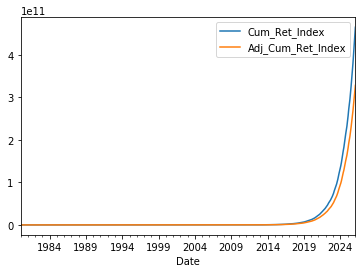

In [46]:
df_output
lines = df_output[['Cum_Ret_Index', 'Adj_Cum_Ret_Index']].plot.line()

numpy.ndarray

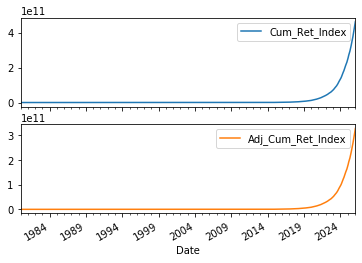

In [49]:
df_output
axes = df_output[['Cum_Ret_Index', 'Adj_Cum_Ret_Index']].plot.line(subplots = True)
type(axes)

In [21]:
# MktCap, prior month close
import pandas as pd

df_MktCap_Top50 = (pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/QuantModel_Tester.xlsx', 
                           sheet_name = 'MktCap', 
                           na_values = "-"))
ISIN = df_MktCap_Top50.pop('ISIN')
df_MktCap_Top50.columns = pd.to_datetime(df_MktCap_Top50.columns, format = '%Y/%m').strftime('%b-%Y')
df_MktCap_Top50.insert(loc = 0, column = 'ISIN', value = ISIN)
df_MktCap_Top50 = df_MktCap_Top50.melt(id_vars = 'ISIN', var_name = 'Date', value_name = 'Mkt_Cap')
#df_MktCap_Top50['Date_ISIN'] = df_MktCap_Top50['Date'].map(str)+"_"+ df_MktCap_Top50['ISIN']
#cols = list(df_MktCap_Top50)
#cols.insert(0, cols.pop(cols.index('Date_ISIN'))) 
#df_MktCap_Top50 = df_MktCap_Top50.loc[:, cols]
#df_MktCap_Top50 = df_MktCap_Top50[['Date_ISIN', 'Mkt_Cap_t-1']]

df_MktCap_Top50[['Date','ISIN','Mkt_Cap']]
df_MktCap_Top50.set_index(['Date','ISIN'])
df_MktCap_Top50['MCap_Rank'] = df_MktCap_Top50.groupby(['Date'])['Mkt_Cap'].rank(ascending =False)

df_MktCap_Top50 = df_MktCap_Top50[(df_MktCap_Top50.MCap_Rank <=50)]


df_MktCap_Top50


,ISIN,Date,Mkt_Cap,MCap_Rank
0,a,Jan-1980,523.404913,48.0
1,b,Jan-1980,516.499409,50.0
2,c,Jan-1980,634.260475,33.0
3,d,Jan-1980,727.333585,24.0
4,e,Jan-1980,794.277511,13.0
7,h,Jan-1980,579.888170,40.0
8,i,Jan-1980,540.397376,45.0
9,j,Jan-1980,849.252397,9.0
10,k,Jan-1980,716.199544,25.0
11,l,Jan-1980,928.033016,4.0
